In [1]:
# We will be coding neural networks from scratch

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
# let us first drop any na values
data = data.dropna()

In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# so based on all the different factors, we want to predict whether the customer have exited or not
# our neural network will only take in numerical values so lets first filter out the data accordingly

In [6]:
data_x = data[["CustomerId", "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]]

In [7]:
data_y = data[["Exited"]]

In [8]:
data_x.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,42,2,0.00,1,1,1,101348.88
1,15647311,608,41,1,83807.86,1,0,1,112542.58
2,15619304,502,42,8,159660.80,3,1,0,113931.57
3,15701354,699,39,1,0.00,2,0,0,93826.63
4,15737888,850,43,2,125510.82,1,1,1,79084.10


In [9]:
data_y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [10]:
data_y.count()

Exited    10000
dtype: int64

In [11]:
data_x.count()

CustomerId         10000
CreditScore        10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
dtype: int64

# Neural networks help to model complex patterns in datasets using mutiple hidden layers and non-linear activation functions

# Takes in an input, passes it through the hidden layers and gives out an ouput which the combined input of all the layers. This output will be our prediction

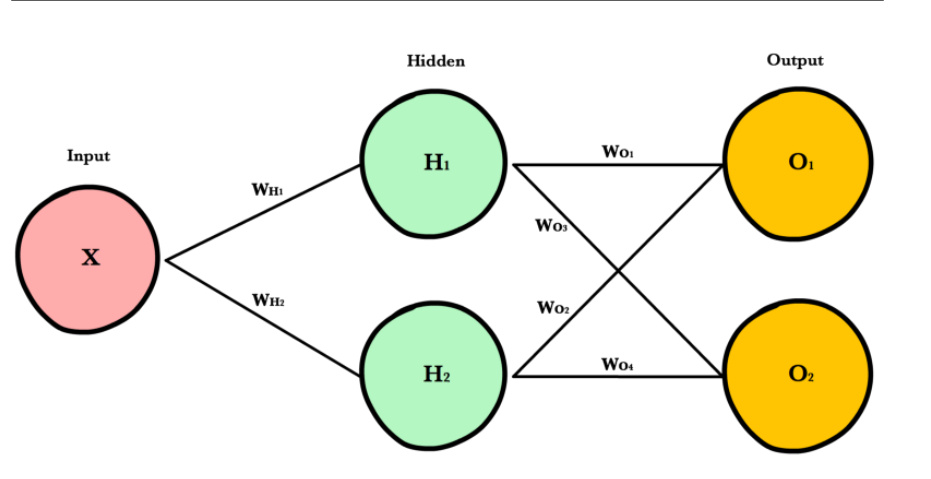

# A neuron takes in a combination of weighted inputs and applies an activation function to return the output

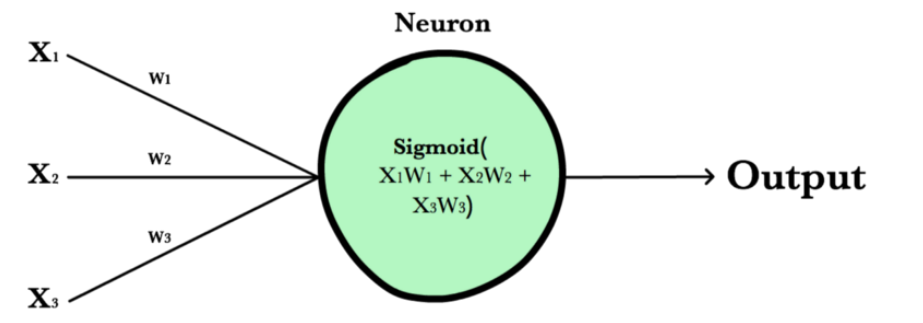

# Forwardpropagation

### Forwardpropagation is how the neural network makes predictions. Input data is "forward propagated" through the network layer by layer to the final layer which outputs a prediction

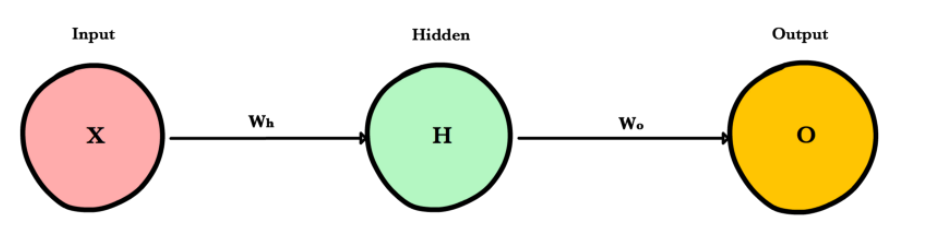

### For the neural network above, a single pass of forward propagation translates mathematically to prediction = A(A(XW_h)W_o). First the input is multiplied by W_h and an activation function like sigmoid or relu is applied on it. This is then multiplied by W_o and then another activation function is applied on it to give the output which is our prediction.

### Now lets create this simple network

In [12]:
def relu(z):
    if (z>0):
        return z
    else:
        return 0

def feed_forward(x, Wh, Wo):
    # Hidden Layer
    Zh = x * Wh
    H = relu(Zh)
    
    # Output Layer
    Zo = H * Wo
    output  = relu(Zo)
    return output

In [ ]:
prediction = feed_forward(data_x, 0.5, 0.6)

# Larger Networks


### In reality networks are much large with many more hidden layers

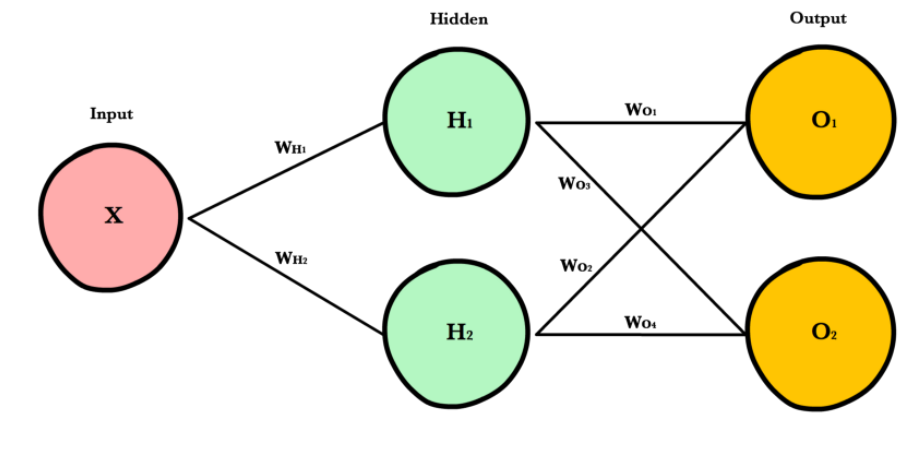

### So lets add a few parameters to make our code more extensible

In [13]:
INPUT_LAYER_SIZE = 1
HIDDEN_LAYER_SIZE = 2
OUTPUT_LAYER_SIZE = 2

In [14]:
# Weight initialisation

def init_weights():
    Wh = np.random.randn(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE)*np.sqrt(2.0/INPUT_LAYER_SIZE)
    Wo = np.random.randn(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE)*np.sqrt(2.0/HIDDEN_LAYER_SIZE)

In [15]:
# example calling randn
arr = np.random.randn(1,2)
print(arr)

[[0.69843834 0.32378217]]


In [16]:
# Bias terms

def init_bias():
    Bh = np.full((1, HIDDEN_LAYER_SIZE), 0.1)
    Bo = np.full((1, OUTPUT_LAYER_SIZE), 0.1)
    return Bh, Bo

In [17]:
# Working with matrices

# To take advantage of fast linear algebra techniques and GPUs, we need to store our inputs, weights and biases
# in matrices. 

# 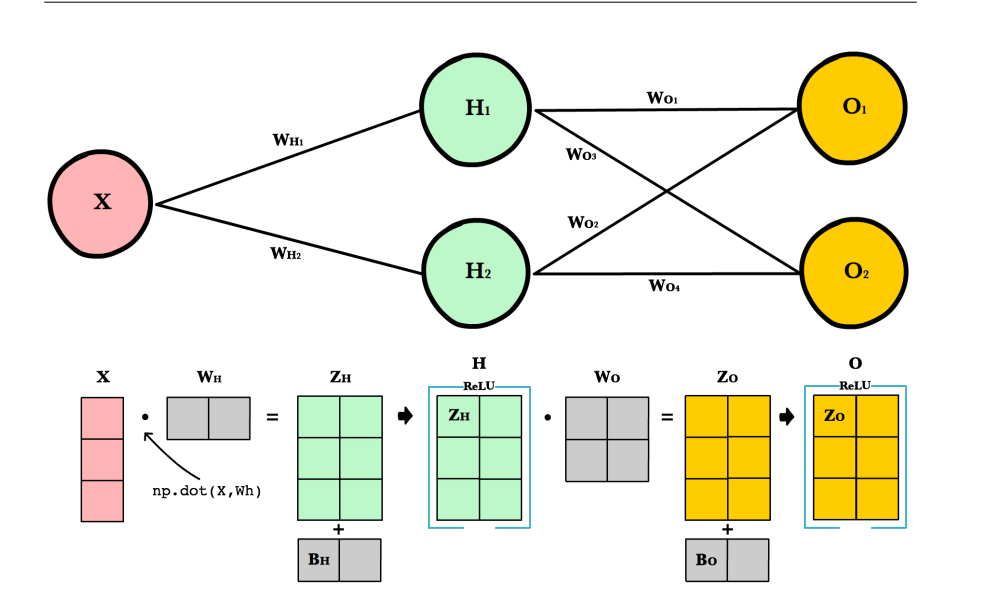

# Refactoring our code

In [18]:

# our new feed forward code which accepts matrices instead of scalar inputs 

In [19]:
def feed_forward(X):
    # Hidden Layer
    Zh = np.dot(X, Wh) + Bh # dot product of the inputs with their respective weights and adding of bias
    H = relu(Zh) # pass this result into the activation function
    
    #Output Layer
    Zo = np.dot(H, Wo) + Bo
    yHat = relu(Zo)
    return yHat

# Putting it all together

In [20]:
INPUT_LAYER_SIZE = 1
HIDDEN_LAYER_SIZE = 2
OUTPUT_LAYER_SIZE = 2

def init_weights():
    Wh = np.random.randn(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE)*np.sqrt(2.0/INPUT_LAYER_SIZE)
    Wo = np.random.randn(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE)*np.sqrt(2.0/HIDDEN_LAYER_SIZE)
    
def init_bias():
    Bh = np.full((1, HIDDEN_LAYER_SIZE), 0.1)
    Bo = np.full((1, OUTPUT_LAYER_SIZE), 0.1)
    return Bh, Bo    

def relu(Z):
    return np.max(0,Z)

def relu_prime(Z):
    Z[Z < 0] = 0
    Z[Z > 0] = 1
    return Z

def cost(yHat, y):
    cost = np.sum((yHat - y)**2) / 2.0
    return cost

def cost_prime(yHat, y):
    return yHat - y    

# Backpropagation 

### We learn these weights and biases and optimize them. We will start with the prediction and see how much it has deviated from the original label. This gives us the error. Then we will adjust the weights and biases

In [21]:
def relu_prime(z):
    if z > 0:
        return 1
    return 0

def cost(yHat, y):
    return 0.5 * (yHat - y)**2

def cost_prime(yHat, y):
    return yHat - y

def backprop(x, y, Wh, Wo, lr):
    yHat = feed_forward(x, Wh, Wo) #get the prediction
    # Layer Error
    Eo = (yHat - y) * relu_prime(Zo) 
    Eh = Eo * Wo * relu_prime(Zh)
    # Cost derivative for weights
    dWo = Eo * H
    dWh = Eh * x
    # Update weights
    Wh -= lr * dWh
    Wo -= lr * dWo